# Black Friday

### Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms
from sklearn import metrics
from sklearn.metrics import r2_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [3]:
train.shape,test.shape

((550068, 12), (233599, 11))

In [4]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
train_orginal = train.copy()
test_orginal  = test.copy()

In [6]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [7]:
train['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [8]:
train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [9]:
train['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [10]:
train['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

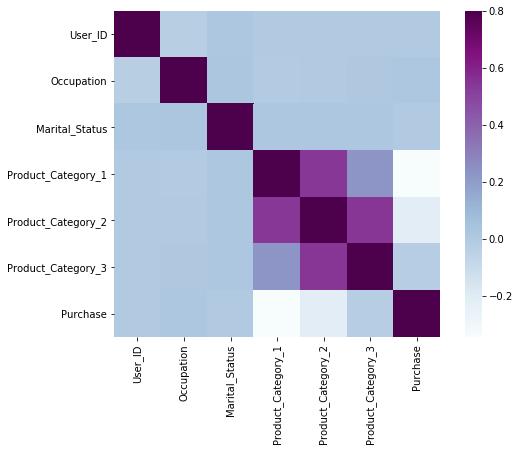

In [11]:
# Print correlation matrix
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [12]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [13]:
#ms.matrix(train)

In [14]:
mapping_Gender = {'M': 1,
                    'F':0}
train['Gender'] = train['Gender'].map(mapping_Gender)

mapping_City_Category = {'A': 1,
                    'B':2,'C':3}
train['City_Category'] = train['City_Category'].map(mapping_City_Category)

mapping_City_Stay_In_Current_City_Years = {'1': 1,
                    '2':2,'3':3,'4+':4,'0':0}
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].map(mapping_City_Stay_In_Current_City_Years)

In [15]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,1,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0-17,10,1,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,1,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0-17,10,1,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,55+,16,3,4,0,8,NaN,NaN,7969


In [16]:
backup_userids=train['User_ID']
backup_Product_IDs=train['Product_ID']

In [17]:
train = train.drop('User_ID',axis=1)
train = train.drop('Product_ID',axis=1)

In [18]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,1,2,0,3,NaN,NaN,8370
1,0,0-17,10,1,2,0,1,6.0,14.0,15200
2,0,0-17,10,1,2,0,12,NaN,NaN,1422
3,0,0-17,10,1,2,0,12,14.0,NaN,1057
4,1,55+,16,3,4,0,8,NaN,NaN,7969


In [19]:
train['Product_Category_2'].fillna(train['Product_Category_2'].mode()[0], inplace=True)
train['Product_Category_3'].fillna(train['Product_Category_3'].mode()[0], inplace=True)

In [20]:
y=train['Purchase']
X=train.drop('Purchase',axis=1)

In [21]:
X.shape

(550068, 9)

In [22]:
X = pd.get_dummies(X)

In [23]:
X.shape

(550068, 15)

In [24]:
from sklearn.tree import DecisionTreeRegressor
Dtree = DecisionTreeRegressor(max_depth=3)
Dtree.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [25]:
y_predicted = Dtree.predict(X)
#print(metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted))
print(r2_score(y, y_predicted))

0.44193548635147195


In [26]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [27]:
y_pred = regressor.predict(X)
print(r2_score(y, y_pred))

0.7657274914627941


In [35]:
X.shape

(550068, 15)

In [28]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


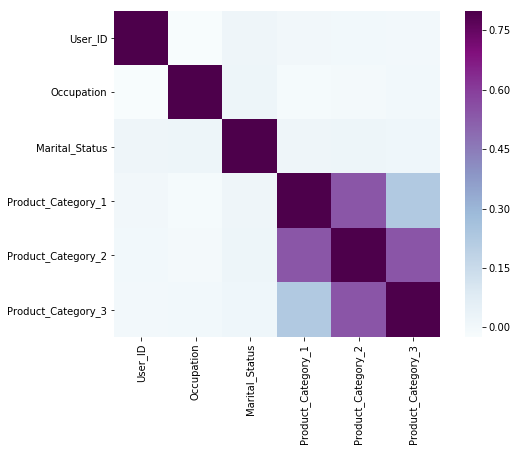

In [29]:
# Print correlation matrix
matrix = test.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [30]:
mapping_Gender = {'M': 1,
                    'F':0}
test['Gender'] = test['Gender'].map(mapping_Gender)

mapping_City_Category = {'A': 1,
                    'B':2,'C':3}
test['City_Category'] = test['City_Category'].map(mapping_City_Category)

mapping_City_Stay_In_Current_City_Years = {'1': 1,
                    '2':2,'3':3,'4+':4,'0':0}
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].map(mapping_City_Stay_In_Current_City_Years)

In [31]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [32]:
test['Product_Category_2'].fillna(test['Product_Category_2'].mode()[0], inplace=True)
test['Product_Category_3'].fillna(test['Product_Category_3'].mode()[0], inplace=True)

In [33]:
backup_userids_test=test['User_ID']
backup_Product_IDs_test=test['Product_ID']

In [34]:
test.shape

(233599, 11)

In [40]:
test = test.drop('User_ID',axis=1)
test = test.drop('Product_ID',axis=1)

In [42]:
test=pd.get_dummies(test)

In [43]:
y_pred = regressor.predict(test)


In [44]:
y_pred.shape,test.shape

((233599,), (233599, 15))

In [45]:
submission = pd.read_csv('Sample_Submission.csv')

In [47]:
submission['User_ID']=backup_userids_test
submission['Product_ID']=backup_Product_IDs_test
submission['Purchase']=y_pred

In [48]:
submission.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,17846.030000
1,1000009,P00113442,10644.806667
2,1000010,P00288442,8338.123999
3,1000010,P00145342,2871.500000
4,1000011,P00053842,2693.560000


In [50]:
submission.to_csv("Sample_Submission.csv", index=False)

In [51]:
from sklearn import linear_model

In [55]:
from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor(n_estimators=100,loss="linear",learning_rate=.005)
regressor.fit(X, y)

AdaBoostRegressor(base_estimator=None, learning_rate=0.005, loss='linear',
         n_estimators=100, random_state=None)

In [53]:
y_pred = regressor.predict(X)

AdaBoostRegressor(base_estimator=None, learning_rate=0.005, loss='linear',
         n_estimators=100, random_state=None)

In [57]:
print(r2_score(y, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [550068, 233599]